In [12]:
%store -r dm

dm = dm

In [13]:
import pandas as pd

data = dm.data.drop("date_forecast", axis=1)

data_A = dm.data_A.drop("date_forecast", axis=1)
data_B = dm.data_B.drop("date_forecast", axis=1)
data_C = dm.data_C.drop("date_forecast", axis=1)

X = dm.data.iloc[:, 2:]
y = dm.data.iloc[:, 1]

X_A = dm.data_A.iloc[:, 2:]
y_A = dm.data_A.iloc[:, 1]
X_B = dm.data_B.iloc[:, 2:]
y_B = dm.data_B.iloc[:, 1]
X_C = dm.data_C.iloc[:, 2:]
y_C = dm.data_C.iloc[:, 1]

X_A = dm.add_location(X_A, "A")
X_B = dm.add_location(X_B, "B")
X_C = dm.add_location(X_C, "C")

X_train_A = X_A.iloc[0:int(0.7*X_A.shape[0]):]
y_train_A = y_A.iloc[0:int(0.7*y_A.shape[0]):]
X_test_A = X_A.iloc[-int(0.3*X_A.shape[0]):] 
y_test_A = y_A.iloc[-int(0.3*y_A.shape[0]):]

#X_test_A, X_validate_A, y_test_A, y_validate_A = train_test_split(X_test_A, y_test_A, train_size=0.4, shuffle=False)

X_train_B = X_B.iloc[0:int(0.7*X_B.shape[0]):]
y_train_B = y_B.iloc[0:int(0.7*y_B.shape[0]):]
X_test_B = X_B.iloc[-int(0.3*X_B.shape[0]):] 
y_test_B = y_B.iloc[-int(0.3*y_B.shape[0]):] 

#X_test_B, X_validate_B, y_test_B, y_validate_B = train_test_split(X_test_B, y_test_B, train_size=0.4, shuffle=False)

X_train_C = X_C.iloc[0:int(0.7*X_C.shape[0]):]
y_train_C = y_C.iloc[0:int(0.7*y_C.shape[0]):]
X_test_C = X_C.iloc[-int(0.3*X_C.shape[0]):] 
y_test_C = y_C.iloc[-int(0.3*y_C.shape[0]):] 

#X_test_C, X_validate_C, y_test_C, y_validate_C = train_test_split(X_test_C, y_test_C, train_size=0.4, shuffle=False)

X_train = pd.concat([X_train_A, X_train_B, X_train_C], ignore_index=True)
#X_validate = pd.concat([X_validate_A, X_validate_B, X_validate_C], ignore_index=True)
X_test = pd.concat([X_test_A, X_test_B, X_test_C], ignore_index=True)

y_train = pd.concat([y_train_A, y_train_B, y_train_C], ignore_index=True)
#y_validate = pd.concat([y_validate_A, y_validate_B, y_validate_C], ignore_index=True)
y_test = pd.concat([y_test_A, y_test_B, y_test_C], ignore_index=True)

X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X.columns)]

X_submission_A = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A.columns)]
X_submission_B = dm.X_test_estimated_b[dm.X_test_estimated_b.columns.intersection(X_B.columns)]
X_submission_C = dm.X_test_estimated_c[dm.X_test_estimated_c.columns.intersection(X_C.columns)]



In [17]:
from autogluon.tabular import TabularPredictor


predictor_A = TabularPredictor(label="pv_measurement", 
                             eval_metric="mean_absolute_error", 
                             path='/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/gluon/A')\
    .fit(data_A, 
         presets=['good_quality'])



Presets specified: ['good_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/gluon/A/"
AutoGluon Version:  0.8.2
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.0.0: Fri Sep 15 14:41:43 PDT 2023; root:xnu-10002.1.13~1/RELEASE_ARM64_T6000
Disk Space Avail:   149.14 GB / 494.38 GB (30.2%)
Train Data Rows:    34037
Train Data Columns: 35
Label Column: pv_measurement
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (5733.42, 0.0, 631.44224, 1166.50284)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor

In [15]:

predictor_B = TabularPredictor(label="pv_measurement", 
                             eval_metric="mean_absolute_error", 
                             path='/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/gluon/B')\
    .fit(data_B, 
         presets=['good_quality'])



Presets specified: ['good_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/gluon/B/"
AutoGluon Version:  0.8.2
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.0.0: Fri Sep 15 14:41:43 PDT 2023; root:xnu-10002.1.13~1/RELEASE_ARM64_T6000
Disk Space Avail:   151.47 GB / 494.38 GB (30.6%)
Train Data Rows:    26583
Train Data Columns: 35
Label Column: pv_measurement
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1152.3, -0.0, 104.12049, 210.24923)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor 

In [16]:
predictor_C = TabularPredictor(label="pv_measurement", 
                             eval_metric="mean_absolute_error", 
                             path='/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/gluon/C')\
    .fit(data_C, 
         presets=['good_quality'])

Presets specified: ['good_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/gluon/C/"
AutoGluon Version:  0.8.2
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.0.0: Fri Sep 15 14:41:43 PDT 2023; root:xnu-10002.1.13~1/RELEASE_ARM64_T6000
Disk Space Avail:   150.05 GB / 494.38 GB (30.4%)
Train Data Rows:    21393
Train Data Columns: 35
Label Column: pv_measurement
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and label-values can't be converted to int).
	Label info (max, min, mean, stddev): (999.6, -0.0, 92.273, 177.2704)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor 

In [22]:
preds_A = pd.DataFrame(predictor_A.predict(X_submission_A))

In [23]:
preds_A

,pv_measurement
0,4.532722
1,4.656161
2,4.798433
3,69.170959
4,296.433746
...,...
715,168.615753
716,45.923435
717,8.003306
718,4.648809


In [24]:
preds_B = pd.DataFrame(predictor_B.predict(X_submission_B))
preds_B

,pv_measurement
0,0.154572
1,0.091479
2,-0.003936
3,3.097060
4,50.276527
...,...
715,40.117130
716,9.453131
717,0.459386
718,0.204520


In [25]:
preds_C = pd.DataFrame(predictor_C.predict(X_submission_C))
preds_C

,pv_measurement
0,0.156714
1,0.153000
2,0.231310
3,4.493346
4,20.236826
...,...
715,41.188744
716,13.818630
717,0.753977
718,0.167397


In [26]:
preds_gluon = pd.concat([preds_A, preds_B, preds_C], ignore_index=True)

preds_gluon

,pv_measurement
0,4.532722
1,4.656161
2,4.798433
3,69.170959
4,296.433746
...,...
2155,41.188744
2156,13.818630
2157,0.753977
2158,0.167397


In [35]:
preds_cat = pd.read_csv("catboost_420_sep.csv")
preds_cat = preds_cat.iloc[:, 1:]

In [36]:
import numpy as np 

preds = np.array(preds_gluon)*0.5 + 0.5*preds_cat

In [37]:
preds 

,0
0,2.436286
1,2.464913
2,2.399216
3,63.763988
4,299.697537
...,...
2155,42.220402
2156,8.450077
2157,1.150847
2158,0.083698


In [52]:
best = pd.read_csv("catxcat.csv")
best = best.iloc[:, 1:]

preds = pd.read_csv("gluon_best.csv")
preds = preds.iloc[:, 1:]
preds[preds<0] = 0

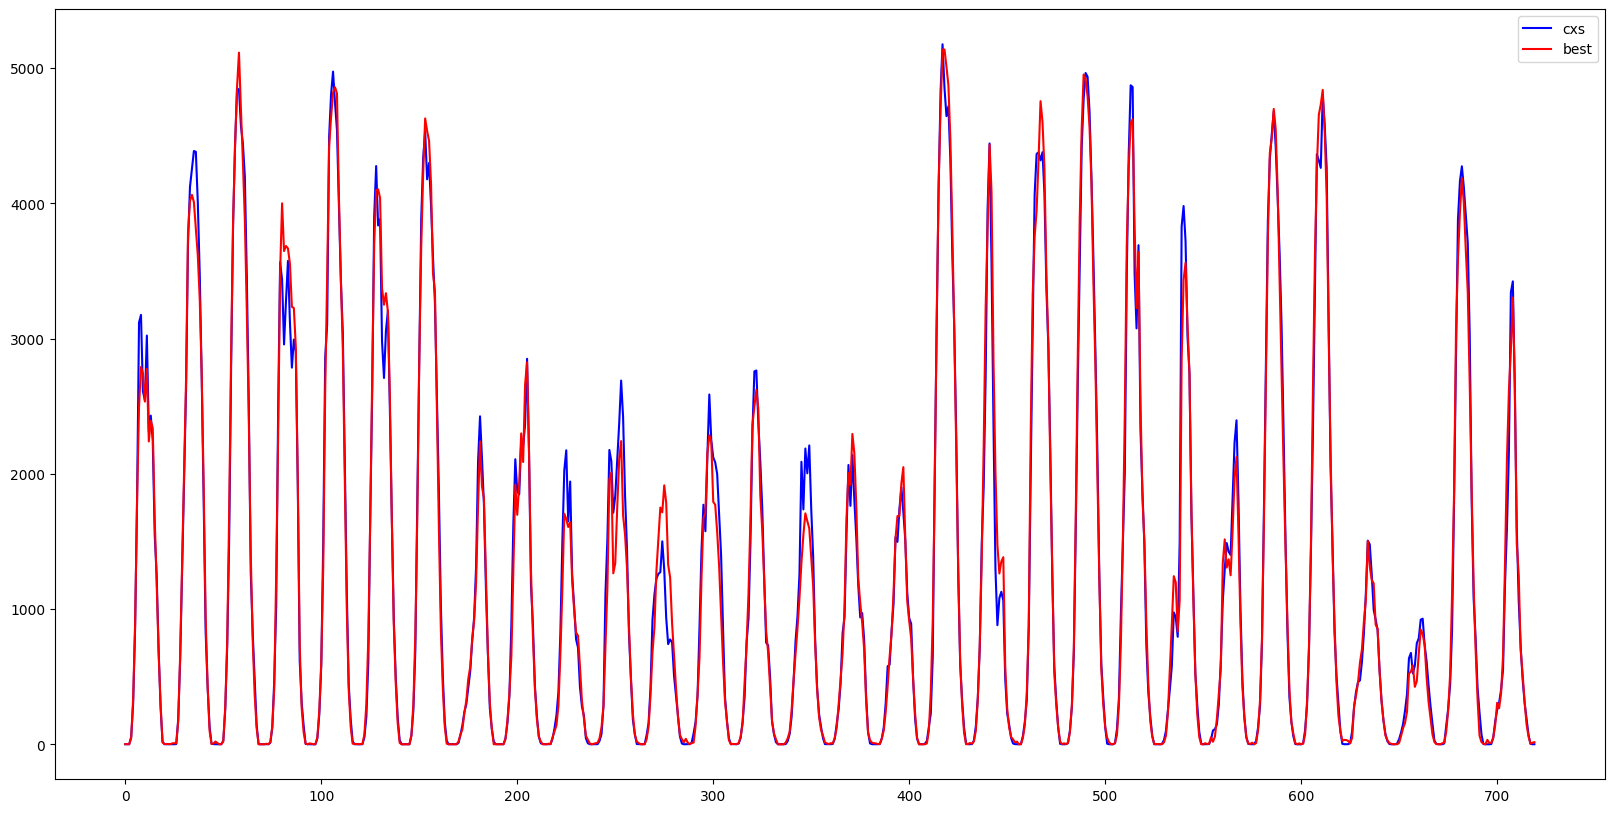

105.06349933586287


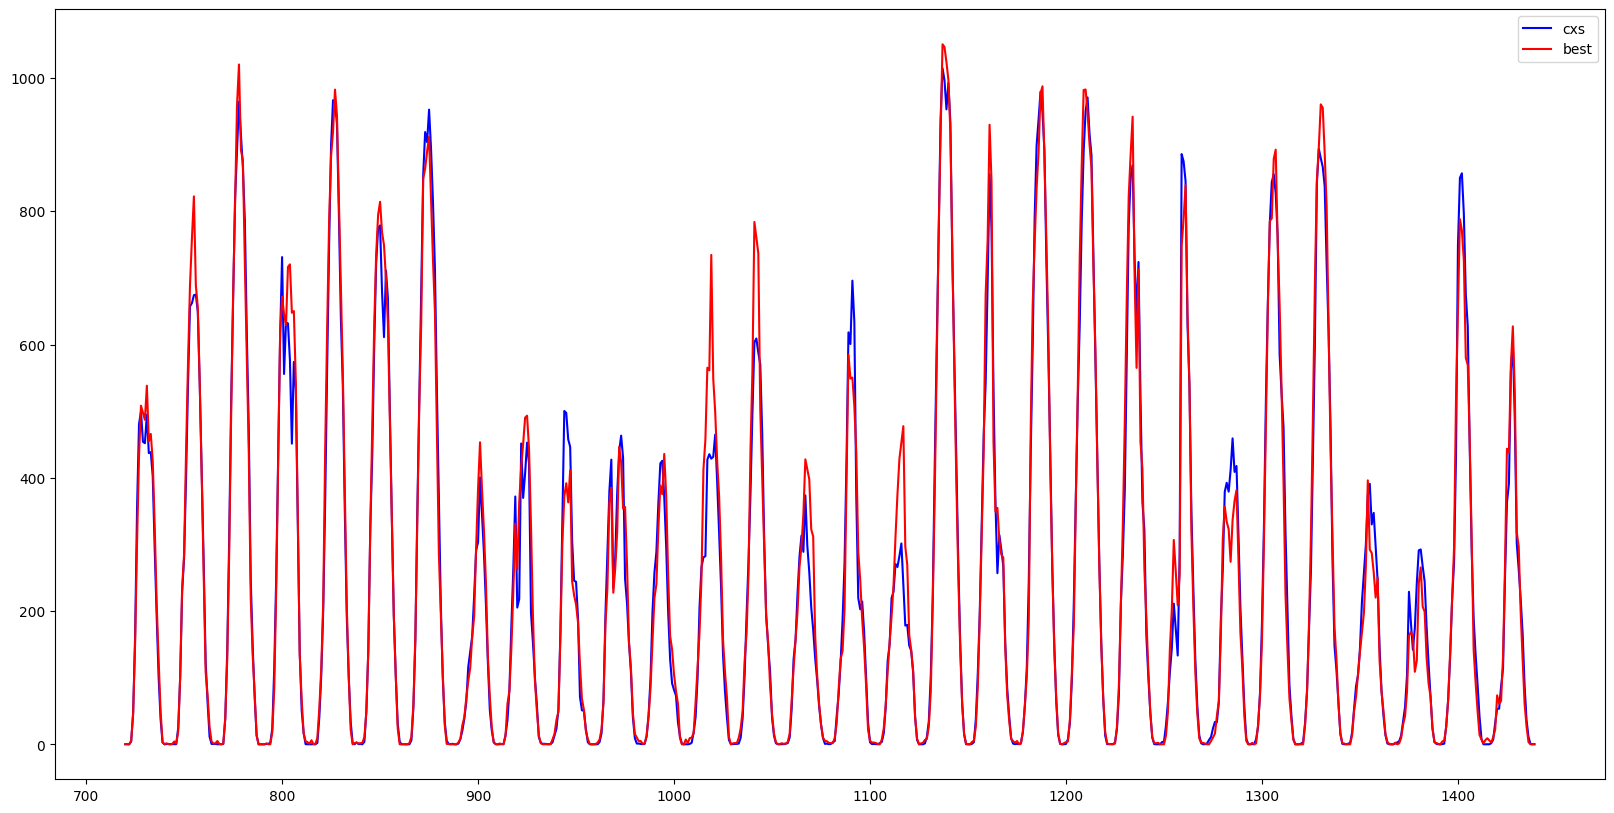

26.820670395209063


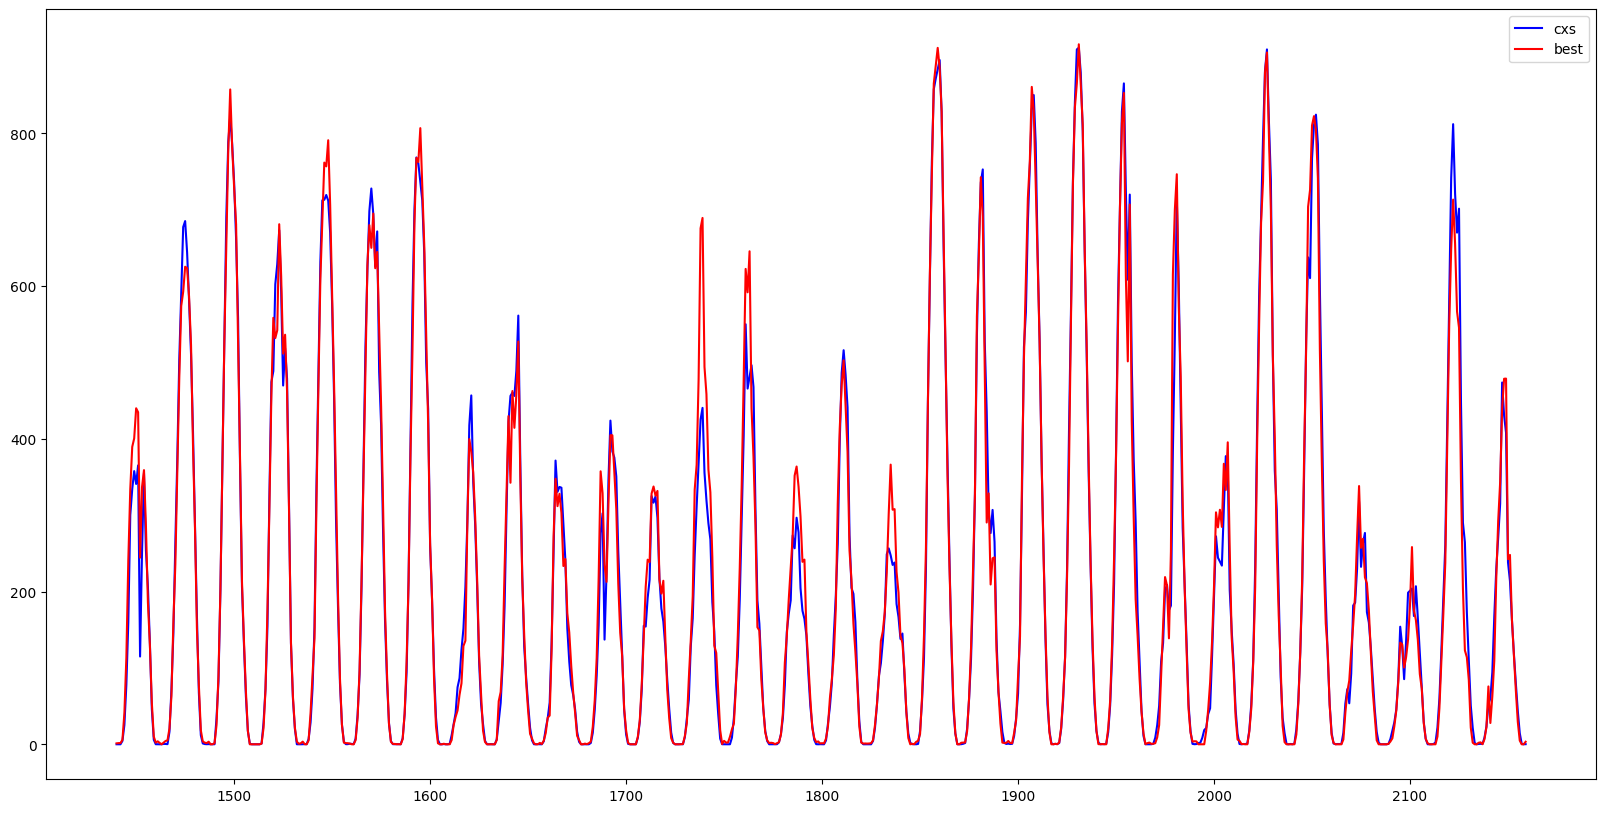

20.786953610070622
50.89037444704752


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(preds[0*720:1*720], color = 'b', label="cxs") 
plt.plot(best[0*720:1*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(preds[0:720], best[0:720]))
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(preds[1*720:2*720], color = 'b', label="cxs") 
plt.plot(best[1*720:2*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(preds[720:2*720], best[720:2*720]))

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(preds[2*720:3*720], color = 'b', label="cxs") 
plt.plot(best[2*720:3*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(preds[2*720:], best[2*720:]))

print(mean_absolute_error(preds, best))

In [54]:
preds.to_csv("gluon_best_01.csv")

In [ ]:
gluon_A = TabularPredictor()

gluon_A.load('gluon_cloud/A2')